<div style="float:left">
    <h1 style="width:600px">Workshop 7: Classification</h1>
    <h3 style="width:600px">CASA0006: Data Science for Spatial Systems</h3>
    <h3 style="width:600px">Author: Huanfa Chen</h3>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-03-22 13:34:18


This week we will focus on **classification algorithms and applications**.  Classifiers are highly useful in extracting patterns from large datasets. By setting up a classifier on an understood, pre-classified subset of the data, we are able to automatically derive greater understanding into other, unclassified datasets.

The process of creating a classifier remains the same regardless of the methods:

1. Organise and clean your dataset.
2. Divide the dataset into training and testing subsets.
3. Use the classifier to associate feature attributes within the training dataset to *known* classifications (known as *training* or *calibration*).
4. Test the strength of model fit by predicting the classifications within the test dataset (known as *testing* or *validation*).
5. If you are happy with the model performance, you can apply the classifier to any new and future data in order to establish classifications. This provides instant insight into the type of data you are receiving.

Once more during this session, we will use Python and specifically the **`pandas`** and **`scikit-learn`** libraries. The method for the application of different classification methods using `sklearn` is helpfully very consistent, as such we will explore a range of different methods today. We will also look at ways to explore the quality of the prediction results, in order to understand how well our mining is going.

As usual, we need to import the relevant libraries to get started, so **run the script below** first to give us access to our basic data analysis packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

### Data Preprocessing

The dataset you'll be working with today relates to the personal characteristics of over 32,000 individuals. Our task is to work out whether we can predict whether an individual's income is above or below $50,000 per annum, based solely on their demographic characteristics. While we are dealing with quite a few attributes here, we're only predicting over two classes, thus it is a relatively straightforward classification problem.

This dataset is originally from the UCI Machine Learning Repository in this [link](https://archive.ics.uci.edu/ml/datasets/Adult). It is also known as the "Census Income" dataset. We downloaded this dataset and transformed it into a csv file so that it is ready to use.

**Download the dataset from Github, and import it as a Pandas dataframe called `original_data`. Inspect the dataset, and use the accompanying metadata to help you understand what you have.**

In [3]:
original_data=pd.read_csv('income.csv')

In [4]:
original_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  over50k         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As you will notice, the data you have been provided with an indicator stating whether the individual does or does not earn over $50000 per annum. Well we use this indicator to define the relationship between the individual's socioeconomic characteristics and this classification.

But to get there, we need to start splitting up our dataset. We need one dataset containing the independent variables, and we need another dataset containing our classifications. We'll eventually pass both of these to the classifier so that it can identify the classification relationship.

So first, we will create our attribute dataset. **Create a new dataframe called `data` that includes all attributes from `original_data` except the `over50k` attribute. Remember to check the contents of your new dataframe to ensure this is the case.**

In [6]:
data=original_data.iloc[:, :14]

Now we will create the label dataset (the `y` variable) by transforming the `over50k` variable into numerics. To do this, we'll use the `LabelEncoder`. This function takes a column of target labels and encode target labels with value between 0 and `n_classes - 1`. A documentation of this function is [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

We can later use the same encoder to reverse the encoding.

**Run the scripts below to first import the `LabelEncoder` tools, and then create the labels dataset from the `over50k` class column.** 

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit(['<=50K', '>50K']) # we explicitly encode '<=50k' and '>50k' with 0 and 1, respectively
label_y = le.transform(original_data['over50k']) # runs LabelEncoder on the over50k column

Now the target variable is ready to go. Next, we need to preprocess the X variables and convert them to numericals, as the `sklearn` classification methods do not play well with text variables.

We do this by converting each categorical attribute into a range of additional boolean columns representing each category, marked with 1s or 0s. This does not change the structure of the dataset as the boolean values will continue to to distinguish between features.

In this case, we use `DictVectorizer`. `DictVectorizer` takes our data as a series of dictionaries, and transforms it into a matrix which is free of categorical data. This function is similar to the `pandas.get_dummies`, although some differences exist. For example, `DictVectorizer` can be integrated into a pipeline in `sklearn` which simplifies the model building, but `pandas.get_dummies` cannot be used with a `sklearn` pipeline.

**Run through the following commands.** Starting with importing the `DictVectorizer` function.

In [9]:
from sklearn.feature_extraction import DictVectorizer

Now we convert our attribute data to an array of dictionaries for the `DictVectorizer`. We use the `Pandas.to_dict()` function for this. The `'records'` flag ensures that the attribute dataset is converted into an array of dictionaries, where each dictionary represents a single data record.

**Run the script to create the dictionaries, and verify the data by checking the first entry.**

In [10]:
data_dict = data.to_dict('records')

**Now we run the `DictVectorizer` to extract the matrix.** This is a very simple procedure, and note below how the commands needed to run this are very similar to those used earlier.

In [11]:
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(data_dict).toarray()  # execute process on the record dictionaries and transform the result into a numpy array object

**Now check `vec_array` to see how widely the dataset has been expanded (remember it consisted of 14 attributes before).**

In [12]:
vec_array

array([[3.9000e+01, 2.1740e+03, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [5.0000e+01, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.8000e+01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [5.8000e+01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.2000e+01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.2000e+01, 1.5024e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [13]:
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))

Number of variables in this transformed data: 108


We can view the feature names by calling the `get_feature_names` function.

In [14]:
vec.get_feature_names()

['age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'education=10th',
 'education=11th',
 'education=12th',
 'education=1st-4th',
 'education=5th-6th',
 'education=7th-8th',
 'education=9th',
 'education=Assoc-acdm',
 'education=Assoc-voc',
 'education=Bachelors',
 'education=Doctorate',
 'education=HS-grad',
 'education=Masters',
 'education=Preschool',
 'education=Prof-school',
 'education=Some-college',
 'fnlwgt',
 'hours-per-week',
 'marital-status=Divorced',
 'marital-status=Married-AF-spouse',
 'marital-status=Married-civ-spouse',
 'marital-status=Married-spouse-absent',
 'marital-status=Never-married',
 'marital-status=Separated',
 'marital-status=Widowed',
 'native-country=?',
 'native-country=Cambodia',
 'native-country=Canada',
 'native-country=China',
 'native-country=Columbia',
 'native-country=Cuba',
 'native-country=Dominican-Republic',
 'native-country=Ecuador',
 'native-country=El-Salvador',
 'native-country=England',
 'native-country=France',
 'native-country=

The final stage in data processing involves splitting the prepared dataset into training and testing subsets. The training data will be used to create the classifier. The testing data will then be used to test the accuracy of a the classification. 

**IMPORTANT**: Splitting the dataset up in this way is an important step. It tests how well the classifier performs against unseen data. This gives a good picture of how well the classifier may work in future. 

Once more, we have a useful tool is `scikit` to do this. The `train_test_split` method randomly splits our attribute and label data into training and testing subsets. Not only does this provide us with  formats to be loaded directly into our classifers, but the random split ensures a good mixing of the records. 

The process is quite straightforward. **We load in the `train_test_split` method and run it against our attribute and label arrays.**

Note: `train_test_split` will split the data according to a 75:25 split, roughly in line with convention. However, other proportions can be specified, check out the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) for details.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
random_state_split = 1024
train_d, test_d, train_lab, test_lab = train_test_split(vec_array, label_y, random_state= random_state_split)

**Check the lengths of the training and testing datasets.**

In [17]:
len(train_d),len(test_d),len(train_lab),len(test_lab)

(24420, 8141, 24420, 8141)

We are now ready to construct our classifiers.

### Artificial Neural Networks (ANN)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture10_Images/ann_layers_multiclass_classification.jpg" width="500px"/>

[Image Credit](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture10_Images/ann_layers_multiclass_classification.jpg)

The first classifier will use is the ANN classifier. We will use the **MLPClassifier**, which implements a multi-layer perceptron (MLP) algorithm that trains using backpropagation. Backpropagation is one way of training the ANN model.

We will show you how to use the MLPClassifier classifer in `scikit`, as well as going into details about how you can assess the quality of the classification.

**IMPORTANT**: Many of the `scikit` classification methods use a very similar syntax. We will show you how to use Logistic Regression, but you will have to work out how to use the others. On completion, we expect you to be able to say which of the four classifiers you will test performs best in predicting whether the individuals in our test dataset earn more or less than $50k per annum.

Across all `scikit` classifiers, a similar process and form of syntax is used. 

1. First, we load the library. 
2. Then, we create the classifier object, and specify any important parameters.
3. We run the `.fit()` method, sending the classifier our training dataset and accompanying labels.
4. We analyse the validate with the `.score()` method, sending the classifier our testing dataset and accompanying labels.

Let's work through this method for the MLPClassifier classifer.

In [18]:
from sklearn.neural_network import MLPClassifier

[This page](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification) is a general description of the method, and [this page](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) outlines all of the parameters and methods associated with the `MLPClassifier` method.

Here are some important settings of this `MLPClassifier` method:

- `hidden_layer_sizes: tuple, length = n_layers - 2, default=(100,)`: this argument is a tuple of number of neurons in each hidden layer. By default, the ANN has one hidden layer with 100 neurons.
- `activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’`: this argument is the activation function and can be one of the four functions. By default, the ANN uses the ReLu function, which is the rectified linear unit function, returns f(x) = max(0, x).
- `random_state`: Determines random number generation for weights and bias initialization, train-test split, etc. Pass an int for reproducible results across multiple function calls.

Common activation functions (including relu) is listed as below:

Step

$$ a(z) = \left \{
\begin{eqnarray}
0,\ \text{if}\ z < 0\\
1,\ \text{if}\ z \geq 0 \\
\end{eqnarray}
\right. 
$$

Sigmoid
$
a(z) = \frac{1}{1+\exp{(-z)}}
$

Hyperboic tangent
$
a(z) = \tanh(z)
$

Rectified linear unit (ReLU)
$
a(z) = \max(0, z)
$

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture10_Images/activation_func.png" width="500px"/>

[Image Credit](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture10_Images/activation_func.png)

**You can use the `%%time` magic to time how long the `.fit()` takes to execute.**

In [19]:
%%time
random_state_ann = 100
# add timing script
ann_clf = MLPClassifier(random_state = random_state_ann)  # creates the ANN classifier using the default parameters
ann_clf.fit(train_d, train_lab)  # executes the classifier on the training dataset

CPU times: user 18.3 s, sys: 21.6 s, total: 39.9 s
Wall time: 6.75 s


MLPClassifier(random_state=100)

Before we move to evaluate the model performance, it is good to ask a few questions about the structure of this ANN:

1. How many hidden layers are there?
1. How many neurons are there is each layer (including input/hidden/output layer)?
1. Does this classifier tell the probability distribution over the two income levels? In other words, is this class a **soft classifier**?

Now, finally, we test how well the classifier predicts the classes of our test dataset. For this stage, we send the test data and labels to the `.score()` function. This outputs the predictive accuracy. It requires you to pass it both the test data and test labels.

**Run the script below to see the accuracy on the testing data.**

In [20]:
ann_clf.score(test_d, test_lab)

0.8012529173320231

Well done, you've created and tested a classifer. And the classifier seems to do pretty well. In any future event, given a load more data we'll be able to predict the salary class of an individual with an expected accuracy of 75.6%, right? 

Well, hold on there, we better do some further tests just to check how good this score actually is...

There are a number of other important ways to assess the quality of your classifier that you should be aware of.

First, you can have a look yourself at the actual results, and identify the records where predictions succeed and fail. You can do this by generating a set of predictions for each record, done using the `.predict()` method. Like `.score()`, this generates classes for a test dataset, but does take a set of labels. You will use this method in classifying any future unlabelled dataset you wish to classify.

**The predictions are recorded within an array using the script below.**

In [21]:
predictions = ann_clf.predict(test_d)

In [22]:
predictions

array([1, 0, 0, ..., 0, 0, 0])

If you look at `predictions`, however, you'll find just 0s and 1s, as these relate to the outputs generated by `LabelEncoder` earlier. What we need to do is convert these back to the original label data. We do this using the `le.inverse_transform` command. We then convert this into a list, and eventually into a Dataframe for easier manipulation. 

**Look at the code below and execute it to produce an ordered list of predicted classifications for the `test_d` dataset.**

In [23]:
predicted = pd.DataFrame(list(le.inverse_transform(predictions)))
print(predicted)

          0
0      >50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
...     ...
8136  <=50K
8137  <=50K
8138  <=50K
8139  <=50K
8140  <=50K

[8141 rows x 1 columns]


Now that you have the predictions, we will explore how the predictions vary with the data using the `sklearn.metrics` library. This toolkit provides a range of measures relating to the predictive power of your classifier. 

A nice and simple exploratory tool is a confusion matrix. This describes the the extents to which each class was correctly and incorrectly classified. It is generated using the `confusion_matrix()` method, which takes the correct and predicted results. These can then be nicely visualised using the `matplotlib` matrix plotting functions.

**First, calcuating the accuracy score using the `metrics.accuracy_score` function.**

In [26]:
from sklearn import metrics
print("Classifcation accuracy: ")
print(metrics.accuracy_score(test_lab, predictions))

Classifcation accuracy: 
0.8012529173320231


**Second, create the matrix and inspect it - what can you derive from this?**

In [27]:
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

**Now, create the confusion matrix. Where is the majority of the error in the classification?** You can read more about the confusion matrix [here](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix).

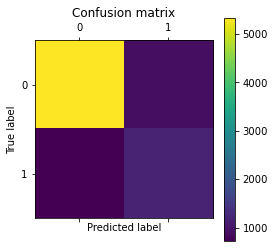

In [28]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

While these measures above provide an overview of the classifier quality, other measures made available in the `metrics` toolset enable a more detailed understanding. Many of the most important measures can be extracted using the `classification_report()` method, which again takes correct labels and compares them against the classifier predictions.

These metrics, called `precision`, `recall` and `f1`, all measure how well a classifier does in predicting each class relative to how often it is incorrect. As such, it allows us to identify the prediction classes where it performs well and where it performs poorly.

**Before executing the code below, look at the [documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) here to gain a little understanding of these measures**

In [29]:
print("Classification results: ")
print(metrics.classification_report(test_lab, predictions))

Classification results: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6231
           1       0.57      0.62      0.59      1910

    accuracy                           0.80      8141
   macro avg       0.73      0.74      0.73      8141
weighted avg       0.81      0.80      0.80      8141



The above result provides a lot of insights into the classification. For example:

1. How many indivuduals are correctly classified regardless of their actual class? (Hint: accuracy, 75.6%) 
1. How many individuals with incomes over 50K are correctly recognised by the classifier? (Hint: recall of Class 1, 60%)
1. Out of all individuals that are classified as earning over 50K, how many of them actually have an income higher than 50K? (Hint: precision of Class 1, 50%)
1. What is the F1-score of this classifier? (The macro average F1-score is 0.69)

Next, we will try other classifiers to see whether we can get a higher classification accuracy or F1-score.

### Logistic regression

Next, we will use **LogisticRegression**.

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
random_state_lr = 200
lr_clf = LogisticRegression(random_state=random_state_lr).fit(train_d, train_lab)

The accuracy of this classifier on the train and test data is:

In [32]:
print("The accuracy of this classifier on the train data is:{}".format(lr_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(lr_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.7956592956592956
The accuracy of this classifier on the test data is:0.802972607787741


In [34]:
predictions = lr_clf.predict(test_d)

In [35]:
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

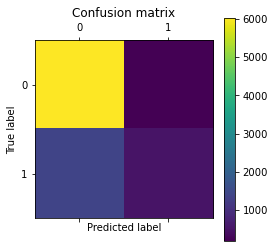

In [36]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      6231
           1       0.72      0.26      0.39      1910

    accuracy                           0.80      8141
   macro avg       0.76      0.62      0.63      8141
weighted avg       0.79      0.80      0.77      8141



**Can you compare the accuracy and F1-score of this classifer against the ANN?**

### Decision Tree

Next, we will use the `DecisionTreeClassifier`.

Before you start, check the [documentation](http://scikit-learn.org/stable/modules/tree.html#classification) here.

**Now create a Decision Tree Classifier for the same scenario and datasets used earlier** (you don't need to recreate the datasets, they are good to go already). We've given you the library import code below to get you started.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_d, train_lab)

DecisionTreeClassifier()

The accuracy of this classifier on the train and test data is:

In [41]:
print("The accuracy of this classifier on the train data is:{}".format(tree_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(tree_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:1.0
The accuracy of this classifier on the test data is:0.8153789460754207


The accuracy on the test data is significantly much better than that on the train data. This indicates potential overfitting.

In [42]:
predictions = tree_clf.predict(test_d)

In [47]:
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

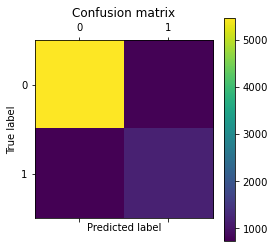

In [48]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6231
           1       0.61      0.61      0.61      1910

    accuracy                           0.82      8141
   macro avg       0.74      0.75      0.74      8141
weighted avg       0.82      0.82      0.82      8141



**Can you compare the accuracy and F1-score of this classifer against the ANN?**

### Random Forest Classifer

We will move forward to use a Random Forest classifier.

To start, read up on the `scikit` Random Forest method [here](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees).

**How well does this model perform relative to the Decision Tree and ANN?**

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
random_state_RF = 200
forest_clf = RandomForestClassifier(random_state = random_state_RF)

In [52]:
forest_clf.fit(train_d,train_lab)

RandomForestClassifier(random_state=200)

The accuracy of this classifier on the train and test data is:

In [53]:
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9999180999180999
The accuracy of this classifier on the test data is:0.8560373418498956


You can compare this accuracy with the decision tree. The random forest classifer has less of the overfitting issue than the decision tree.

In [54]:
predictions = forest_clf.predict(test_d)

In [55]:
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

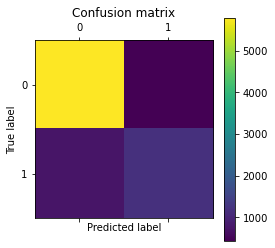

In [56]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [57]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6231
           1       0.73      0.62      0.67      1910

    accuracy                           0.86      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



### Hyperparameter tuning for random forests

In machine learinng, hyperparameters are model settings that control the learning process (e.g. number of trees in a random forest). They should be distinguished from **parameters** that are automatically learnt in the model training process (e.g. splits in a tree of a random forest).

Hyperparameters need to be predefined before model training. Normally, the packages that we use provide default value for hyperparameters. For example, if we create a `RandomForestClassifier` without specifying n_estimator, the number of trees (aka `n_estimators`) is set as 100 by default. More details can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

How does the number of trees influence the performance and computation of the random forest? Generally, the more trees, the smaller variance in the classification result and the higher computation cost (e.g. memory and time). The computation time is nearly a linear function of the number of trees.

Here, we are interested to test whether we can find a better value for the number of trees. We would like to test a range of values, namely 50, 100, 200, 300, 400. Again, choosing these values is kind of subjective.

We will use the grid search and 5-fold cross validation to tune this hyperparameter.

An illustration of k-fold cross validation is as follows:

![](https://github.com/huanfachen/Spatial_Data_Science/raw/main/Images/grid_search_cross_validation.png)

First, we look at how to do cross validation in `sklearn`. There are different ways to do this in `sklearn`, and one of these is calling the `cross_val_score` function, which evaluates a score using cross validation. The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

Here we focus on the accuracy score. So, run the following code to use cross validation for a random forest classifier.

In [58]:
%%time
# number of fold as 5
cv_fold=5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf = RandomForestClassifier()

# call the cross_val_score function
scores = cross_val_score(clf, train_d, train_lab, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.8482801  0.8515561  0.85544636 0.86056511 0.85135135]
Accuracy: 0.85 (+/- 0.00)
CPU times: user 14 s, sys: 0 ns, total: 14 s
Wall time: 14 s


The result contains a list of five accuracy scores, each of which is generated by training a classifier on four folds and testing the classifier on the other fold. Then, the avearge and standard deviation of the accuracy scores is calculated and printed.

Next, we use the 5-fold cross validation and grid search to tune the `n_estimators` and `max_depth` of a random forest. Note that the grid search is not limited to one or two hyperparamters. It works with any number of hyperparameters.

Grid search is an exhaustive search procedure over specified hyperparameter values for a model.

![](https://929687.smushcdn.com/2633864/wp-content/uploads/2021/03/hyperparameter_tuning_cv_grid_search-e1615719602429.png?lossy=1&strip=1&webp=1)

[Image Credit](https://929687.smushcdn.com/2633864/wp-content/uploads/2021/03/hyperparameter_tuning_cv_grid_search-e1615719602429.png?lossy=1&strip=1&webp=1)

We will use the **GridSearchCV** function from the `sklearn` library. This function integrates the grid search and cross validation procedure. Its documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Run the following code to do GridSearchCV. This process may take several minutes.

In [59]:
from sklearn import model_selection

In [61]:
%%time

# values of max_depth. 6 values ranging from 10 to 100 - what is the step length here?
list_max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]

# values of n_estimators
list_n_estimators = [50, 100, 200, 300, 400]
# create a grid of the two hyperparameters
grid_hyperparameters = {'n_estimators':list_n_estimators,
                       'max_depth': list_max_depth}

random_state_rf = 300

rf = RandomForestClassifier(random_state_rf)

clf = model_selection.GridSearchCV(rf, grid_hyperparameters)

clf.fit(train_d, train_lab)

CPU times: user 11min 17s, sys: 2.35 s, total: 11min 19s
Wall time: 11min 18s


GridSearchCV(estimator=RandomForestClassifier(n_estimators=300),
             param_grid={'max_depth': [10, 30, 50, 70, 90, 110],
                         'n_estimators': [50, 100, 200, 300, 400]})

In [62]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 30, 'n_estimators': 200}
The best score is: 
0.8601965601965602


On my computer, it says that the best hypterparameters is n_estimators=**??** and max_depth=**??**. 

Note that this might be subject to randomisation, which means you could get a different result if you change the value of **random_state_rf**.

Here are some questions regarding the above grid search. Give it a try!

1. How many combinations of (n_estimators, max_depth) are tested in the grid search?
1. What is the average run time of each combination?
1. How many random forest models are built in the grid search?
1. The value of random_state of RandomForestClassifier will lead to different models and predictive accuracy. Can you use the grid search to find the optimal random_state value?


Grid search is a good way to tune the hyperparameters when there is only a few combinations to search. However, when there are hundreds or thousands of combinations, the exhaustive search method would be inefficient. In the later lectures and workshops, we will learn more advanced methods for tuning the hyperparameters.

### In Conclusion...

In this workshop, we have practiced several algorithms for classification and different techniques for building a classification models (e.g. splitting training and testing data, cross validation, grid search, hyperparameter tuning). Please be aware that these techniques are not restricted to classification models. They are widely applicable for supervised learning tasks, e.g. regression.

There are a few challenges that I want you to explore. Go on, give at least one of them a go.

- Try to use the permutation feature importance from the Week-6 workshop to understand the relative importance of these variables for predicting income levels.
- Try to compare the results of different classification algorithms using different metrics (e.g. accuracy, precision, recall, F1). Which algorithm is the best?
- Use these classification algorithms in another dataset (with more than two classes of the dependent variable) and compare the performance.